In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import glob
import os

import sys
sys.path.append("../")

from early_sn_classifier import *
from classifier_sigmoid import *

In [2]:
data_dir = '../../../../referee/'

In [3]:
# construct big classification
big_class = {}
big_class['multiple_object'] = ['EB*', 'EllipVar', 'Symbiotic*','SB*','DQHer', 
                                'Nova-like','EB*betLyr','AMHer','Nova','EB*Algol',
                                'EB*WUMa','CataclyV*',
                                  'DwarfNova','EB*']
big_class['star'] = ['brownD*','SG*','RCrB_Candidate', 'HV*', 'WR*', 'YellowSG*','gammaDor','RotV*alf2CVn',
                     'Erupt*RCrB','BlueStraggler','Eruptive*','V*?', 'Pulsar', 
                     'PulsV*bCep','low-mass*','post-AGB*', 'Pec*','pMS*','HotSubdwarf',
                     'PM*','*inNeb','pulsV*SX','RGB*','HB*','BYDra',
                       'PulsV*RVTau', 'BlueSG*','Irregular_V*','WD*','Ae*','RedSG*',
                     'AGB*','OH/IR','Be*','Cepheid','PulsV*delSct','RotV*','PulsV*',
                       'PulsV*WVir','S*','RSCVn','deltaCep','TTau*','Em*','Orion_V*',
                     'YSO','V*','C*','Mira','LPV*','Star','RRLyr']
big_class['AGN-like'] = ['LINER','Blazar','AGN','BLLac','QSO','Galaxy']
big_class['other_SN'] = ['SNIb-pec', 'SNIb/c','SNII-pec','SN', 'SNIbn','SNIc-BL','SNI',
                   'SNIb','SNIIb','SLSN-II','SNIIP','SLSN-I','SNIc','SNIIn','SNII',
                  'SN Ibn','SN Ic-BL','SN I', 'SN Ib','SN IIb','SN IIP', 'SN Ic','SN IIn',
                   'SN II', 'SN Icn', 'SN Ib/c','SN Ib-pec','SN IIL', 'SN II-pec', 'SNIcn']
big_class['other_TNS'] = ['Mdwarf', 'LBV','TDE','Other','CV','Varstar', 'M dwarf','LRN',
                          'FRB']
big_class['SNIa'] = ['Ia', 'SN Ia', 'SN Ia-91T-like', 'SN Ia-91bg-like', 'SN Ia-CSM', 
                'SN Ia-pec', 'SN Iax[02cx-like]']


# reverse it
class_dict = {}
for key in big_class.keys():
    for item in big_class[key]:
        class_dict[item] = key

In [4]:
fname = data_dir + '/data/features.csv'
features = pd.read_csv(fname, index_col=False)

In [5]:
dirname = data_dir + '/UncSampling/queries/'

flist = glob.glob(dirname + '*.dat')

tot = 0

queries = {}
ids = []

for i in range(len(flist)):
    data = pd.read_csv(flist[i], delim_whitespace=True, skiprows=1, 
                       names = ['mute'] + list(features.keys()), 
                       index_col=False)
    data['big_class'] = None
    
    for j in range(data.shape[0]):
        data.loc[j, 'big_class'] = class_dict[data.iloc[j]['type']]
    
    types, freq = np.unique(data['big_class'].values, return_counts=True)
    
    tot = tot + data.shape[0]
    
    for j in range(len(types)):
        if types[j] in queries.keys():
            queries[types[j]].append(freq[j])
        else:
            queries[types[j]] = [freq[j]]
            
    data['iteration'] = i
    data['loop'] = np.arange(300)
    ids.append(data[['id', 'type', 'iteration', 'loop', 'big_class', 'nrise_r', 'nrise_g']])
    
ids2 = pd.concat(ids, ignore_index=True)
ids2['strategy'] = 'UncSampling'

In [6]:
norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), '#F5622E'],
          [norm( 1.0), '#15284F']]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

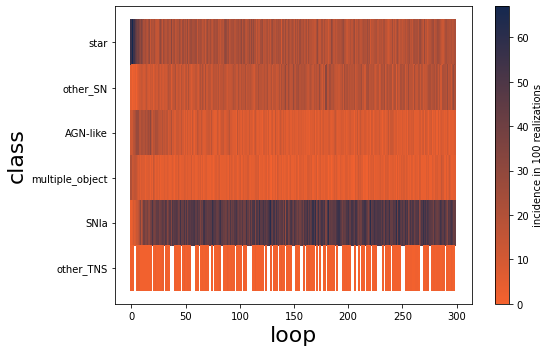

In [8]:
ids3 = ids2.rename(columns={'big_class': 'class'})

plt.figure(figsize=(8,5))
ax = sns.histplot(ids3, x='loop', y='class', bins=60, cbar=True, cmap=cmap,
                  discrete=(True, True), cbar_kws={'label': 'incidence in 100 realizations'})
ax.set_xlabel('loop', fontsize=22)
ax.set_ylabel('class', fontsize=22)
plt.tight_layout()
#plt.show()
plt.savefig(data_dir + '/plots/classes_in_loop.pdf')